# Feature Expansion - Polynomials and Interactions

## 1) Warmup

Which types of feature engineering have you seen last week?

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12,6)

## 2.1) Polynomials

Sum of powers of x, multiplied by some coefficient

$$
a_0 * x^0 + a_1 * x^1 + a_2 * x^2 + ...
$$

#### Load the Anscombe dataset

In [2]:
df = sns.load_dataset('anscombe')

#### Visualize the dataset

In [3]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [6]:
df.describe() # works only on numerical data

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [8]:
df.shape

(44, 3)

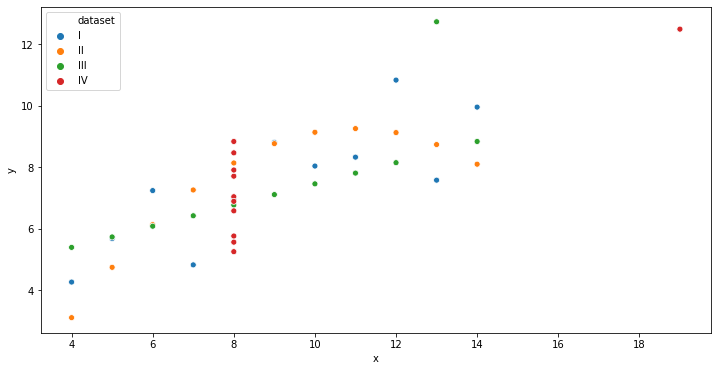

In [11]:
sns.scatterplot(x='x', y='y', data=df, hue='dataset')

#### Let's create a filter

In [12]:
dataset2 = df['dataset'] == 'II'

#### And visualize the resulting dataset

In [13]:
df[dataset2]

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


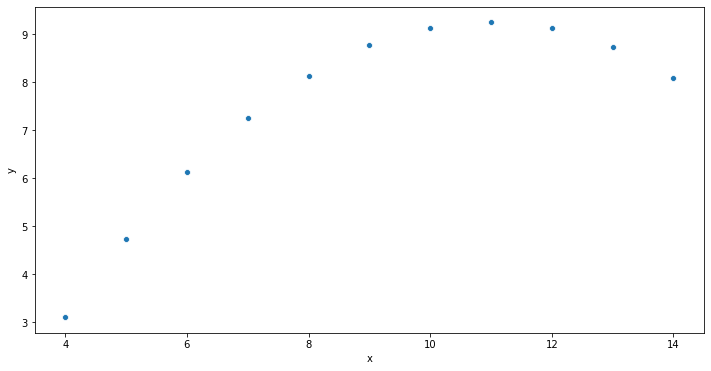

In [14]:
sns.scatterplot(x='x', y='y', data=df[dataset2])

#### And create our X and y data

In [62]:
X = df[dataset2]['x']
y = df[dataset2]['y']

#### No poly-plot - plot a 'normal' Linear Regression

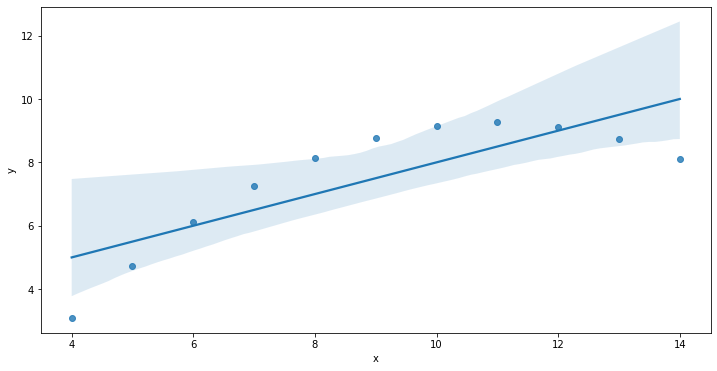

In [17]:
sns.regplot(x='x', y='y', data=df[dataset2])

# blue shadow = confidence interval (the area where we are cofident about our results)

#### Now lets try a polynomial plot

In [19]:
df['x^2'] = df['x']**2

In [23]:
df.shape

(44, 4)

In [53]:
#X = df[dataset2][['x^2']] # double square brackets to cast it into a dataframe

In [54]:
type(X)

pandas.core.frame.DataFrame

In [55]:
X.shape

(11, 1)

#### The polynomial in this case would be $b + w_1 * x^1 + w_2 * x^2$
#### Lets fit a model

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
m = LinearRegression()
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### And plot the result

In [47]:
ypred = m.predict(X)

In [63]:
sns.scatterplot(x=X['x'], y=y)
sns.lineplot(x=X['x'],  y=ypred, color='r')

KeyError: 'x'

---

### Fortunately we don't have to write this ourselves! Sklearn does it for us

In [64]:
from sklearn.preprocessing import PolynomialFeatures

#### Create a polynomial feature transformer, specify the degrees

In [71]:
pt = PolynomialFeatures(degree=2)

#### Fit transform the data in question, and visualise in a DF with column names

In [72]:
p_features = pt.fit_transform(X[['x']])
pd.DataFrame(p_features, columns=pt.get_feature_names())

KeyError: "None of [Index(['x'], dtype='object')] are in the [index]"


#### Fit LinReg on it

In [ ]:
# look at R squared and cross validation if you are overfitting
# as you raise the degrees of freedom, you are getting closer to overfitting
# ! do cross validation on your results - check for good variance 

---

### 2.2) Interaction terms
* If our X data has 2 features, x1 and x2, then a 2 degree polynomial result would take the form:
* $1, x1, x2, x1^2, x1*x2, x2^2$
* Each of these get their own coefficient
* We can use the polynomial preprocessing function, but set interaction_only=True
* First we need an x2!

In [73]:
# real world example for interaction term (when the sum is more important the individual features)
# temperature and humidity: high temp and high humidity - no one wants to ride a bike anymore

---

In [74]:
X

11    10.0
12     8.0
13    13.0
14     9.0
15    11.0
16    14.0
17     6.0
18     4.0
19    12.0
20     7.0
21     5.0
Name: x, dtype: float64

### Tips for using Polynomials and Interactions
* Normalize after Polynomials - By creating interactions between normalized data the magnitude is smaller than the original. You use Polynomial Features to increase signal, so make sure you don't reduce the signal through normalization
* Don't do interaction terms with one-hot encoded features - multiplying by 1 doesn't change the data, and multiplying by 0 results in 0. Neither outcome is very useful!!

### Applying to Bike data:
* Use these techniques to improve performance, but beware:
    * use this predominantly on continous data! not so much on categorical
    * Overfitting - as degress increase, overfiiting is more likely
    * Curse of dimensionality - beware having too many features, because you can't spot patterns anymore
    * How many is too many - ???

---

### Further reading:
* Radial Basis Functions - see chapter 4.4